# Official Efficiency Plots for 2017 and 2018

Dedicated notebook to produce all efficiency plots (2017 and 2018) to ringer note/paper.

In [2]:
from Gaugi.monet.PlotFunctions import *
from Gaugi.monet.TAxisFunctions import *
from Gaugi.monet.AtlasStyle import *
from EfficiencyTools.analysis.utils import GetHistogramRootPaths, GetHistogramFromMany, GetProfile, PlotProfiles
from ROOT import kBlack,kBlue,kRed,kAzure,kGreen,kMagenta,kCyan,kOrange,kGray,kYellow,kWhite,TColor,gStyle
SetAtlasStyle()
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

Welcome to JupyROOT 6.23/01
Using all sub packages with ROOT dependence

Applying ATLAS style settings...


In [3]:
def Save(hists, keys, paths, output):
    from Gaugi.storage import StoreGate
    store = StoreGate(output)
    for idx, _path in enumerate(paths):
        key = keys[idx]
        __path = str('/').join(_path.split('/')[0:-1])
        if key in hists.keys():
            store.mkdir(__path)
            store.cd(__path)
            store.addObject(hists[key])
    store.write()
    
def Load(input, keys, paths):
    d = {}
    from Gaugi.storage import StoreGate
    store = StoreGate(input, restoreStoreGate=True)
    dirs = store.getDirs()
    for idx, _path in enumerate(paths):
        key = keys[idx]
        __path = '/' + _path
        if __path in dirs:
            hist = store.histogram(__path)
            d[key] = hist
    return d

## 1) Read all files:

### 1.1) Create keys and paths

In [4]:
triggers = [
            'HLT_e26_lhtight_nod0_ivarloose',
            'HLT_e26_lhtight_nod0_ringer_ivarloose',
            'HLT_e28_lhtight_nod0_ivarloose',
            'HLT_e28_lhtight_nod0_ringer_ivarloose',
            'HLT_e17_lhvloose_nod0_L1EM15VHI',
            'HLT_e17_lhvloose_nod0_ringer_L1EM15VHI',
            'HLT_e60_lhmedium_nod0',
            'HLT_e60_lhmedium_nod0_ringer',
            ]
paths, keys =  GetHistogramRootPaths( triggers, removeInnefBefore=False, is_emulation=False)

Making paths...|############################################################| 8/8
Making paths...... finished task in 0.017653s.


### 1.2) Read 2017 data:

If you ran these cells below and have the root histograms in your workspace, please execute the subsection 1.5. If not, run these cells below and save if with 1.4 cells subsection.

**NOTE**: These steps below take about ~5-10 minutes to read everything from the external hard-driver (castor).

In [5]:
path = '/Volumes/castor/cern_data/data17_13TeV/Mon/EGAM1/before_ts1'
h_data17_before_ts1 = GetHistogramFromMany(path, paths, keys)

Loading...|############################################################| 188/188
Loading...... finished task in 23.401269s.


In [6]:
path = '/Volumes/castor/cern_data/data17_13TeV/Mon/EGAM7/before_ts1/user.*'
h_data17_before_ts1_egam7 = GetHistogramFromMany(path, paths, keys)

Loading...|############################################################| 172/172
Loading...... finished task in 20.069772s.


## 2) Official plots (e28 ringer vs noringer 2017, after TS1):

Compare ringer and noringer (backup triggers) chains.

In [9]:
def AddLegend(canvas, x, y, legends):
    MakeLegend( canvas,x,y,x+0.77,y+0.25,textsize=16, names=legends, option = 'p' )

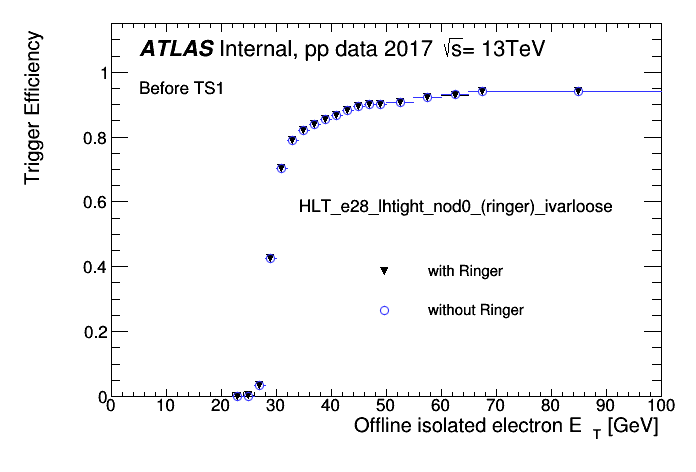

In [10]:
these_colors = [kBlack,kBlue-4]
these_markers = [23, 24]
these_transcolors = []
hists_et = [
            GetProfile(h_data17_before_ts1['HLT_e28_lhtight_nod0_ivarloose_HLT_match_et'],
                       h_data17_before_ts1['HLT_e28_lhtight_nod0_ivarloose_HLT_et']),
            GetProfile(h_data17_before_ts1['HLT_e28_lhtight_nod0_ringer_ivarloose_HLT_match_et'],
                       h_data17_before_ts1['HLT_e28_lhtight_nod0_ringer_ivarloose_HLT_et']),
]
canvas = PlotProfiles( hists_et, 'Offline isolated electron E_{T} [GeV]', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=1.15, y_axes_minimum=0.0)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017 #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.43, 0.55, 'HLT_e28_lhtight_nod0_(ringer)_ivarloose', textsize=0.04)
AddTexLabel(canvas, 0.2, 0.8, 'Before TS1', textsize=0.04)


AddLegend( canvas,0.49,0.3, ['with Ringer', 'without Ringer'] )
canvas.Draw()
canvas.SaveAs('eff_EGAM1_e28_ringer_and_noringer_2017_before_ts1_HLT_et.pdf')

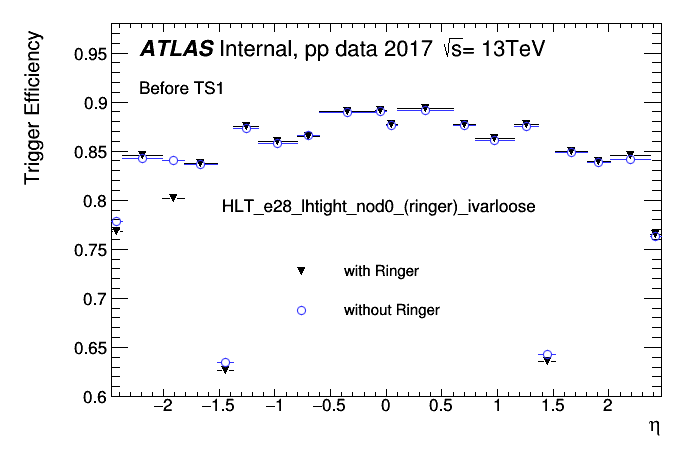

In [11]:
these_colors = [kBlack,kBlue-4]
these_markers = [23, 24]
these_transcolors = []
hists_eta = [
            GetProfile(h_data17_before_ts1['HLT_e28_lhtight_nod0_ivarloose_HLT_match_eta'],
                       h_data17_before_ts1['HLT_e28_lhtight_nod0_ivarloose_HLT_eta']),
            GetProfile(h_data17_before_ts1['HLT_e28_lhtight_nod0_ringer_ivarloose_HLT_match_eta'],
                       h_data17_before_ts1['HLT_e28_lhtight_nod0_ringer_ivarloose_HLT_eta']),
            ]
canvas = PlotProfiles( hists_eta, '#eta', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=0.98, y_axes_minimum=0.6)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017 #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.32, 0.55, 'HLT_e28_lhtight_nod0_(ringer)_ivarloose', textsize=0.04)
AddTexLabel(canvas, 0.2, 0.8, 'Before TS1', textsize=0.04)
AddLegend( canvas,0.37,0.3, ['with Ringer', 'without Ringer'])
canvas.Draw()
canvas.SaveAs('eff_EGAM1_e28_ringer_and_noringer_2017_before_ts1_HLT_eta.pdf')

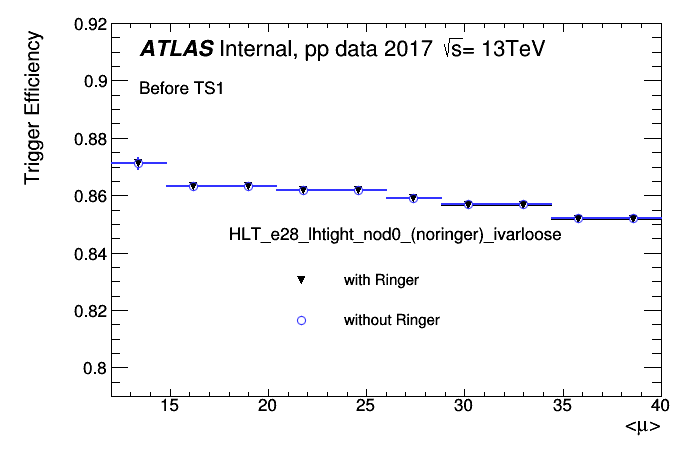

In [12]:
resize =  [10,12,40]
these_colors = [kBlack,kBlue-4]
these_markers = [23, 24]
these_transcolors = []
hists_mu = [
            GetProfile(h_data17_before_ts1['HLT_e28_lhtight_nod0_ivarloose_HLT_match_mu'],
                       h_data17_before_ts1['HLT_e28_lhtight_nod0_ivarloose_HLT_mu'], resize),
            GetProfile(h_data17_before_ts1['HLT_e28_lhtight_nod0_ringer_ivarloose_HLT_match_mu'],
                       h_data17_before_ts1['HLT_e28_lhtight_nod0_ringer_ivarloose_HLT_mu'],resize),
]
canvas = PlotProfiles( hists_mu, '<#mu>', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=0.92,y_axes_minimum=0.79)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017 #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.33, 0.49, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
AddTexLabel(canvas, 0.2, 0.8, 'Before TS1', textsize=0.04)
AddLegend( canvas,0.37,0.28, ['with Ringer', 'without Ringer'] )
canvas.Draw()
canvas.SaveAs('eff_EGAM1_e28_ringer_and_noringer_2017_before_ts1_HLT_mu.pdf')

### 2.1) Check fake rejection for FastCalo step:

**NOTE**: For Run-2, to get the fast-calo boolean, point the histogram to L2

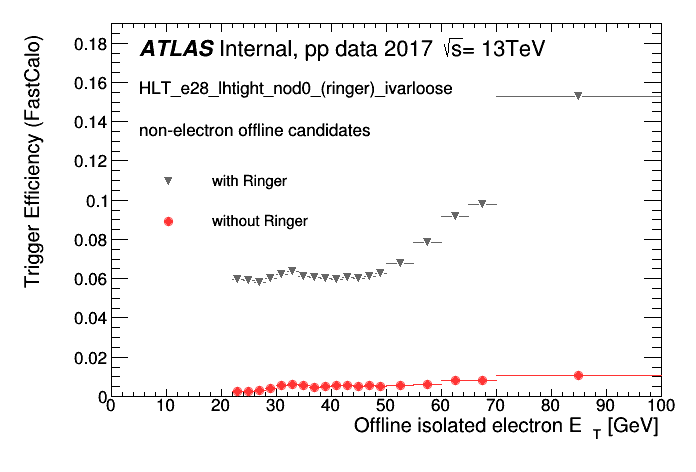

In [13]:
these_colors = [kGray+2,kRed-4]
these_markers = [23, 20]
these_transcolors = []
hists_et = [
            GetProfile(h_data17_before_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_L2_match_et'],
                       h_data17_before_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_L2_et']),
            GetProfile(h_data17_before_ts1_egam7['HLT_e28_lhtight_nod0_ringer_ivarloose_L2_match_et'],
                       h_data17_before_ts1_egam7['HLT_e28_lhtight_nod0_ringer_ivarloose_L2_et']),
]
canvas = PlotProfiles( hists_et, 'Offline isolated electron E_{T} [GeV]', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=0.19, y_axes_minimum=0.0,
                       ylabel='Trigger Efficiency (FastCalo)')
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017 #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.2, 0.80, 'HLT_e28_lhtight_nod0_(ringer)_ivarloose', textsize=0.04)
AddTexLabel(canvas, 0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
AddLegend( canvas,0.18,0.49,['with Ringer', 'without Ringer'] )
canvas.Draw()
canvas.SaveAs('eff_EGAM7_e28_ringer_and_noringer_2017_before_ts1_L2Calo_et.pdf')

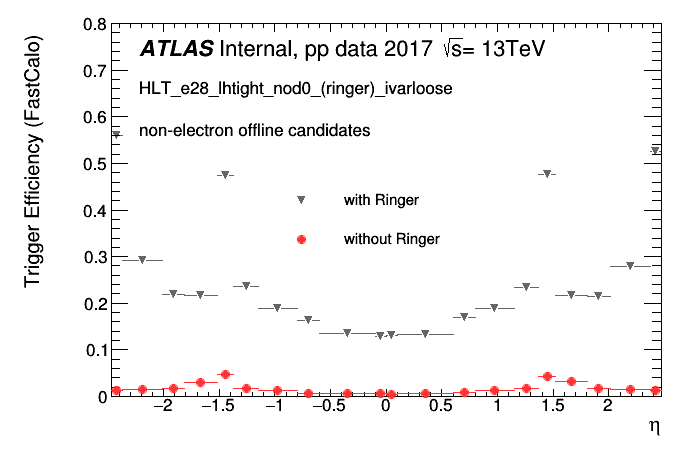

In [14]:
these_colors = [kGray+2,kRed-4]
these_markers = [23, 20]
these_transcolors = []
hists_eta = [
            GetProfile(h_data17_before_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_L2_match_eta'],
                       h_data17_before_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_L2_eta']),
            GetProfile(h_data17_before_ts1_egam7['HLT_e28_lhtight_nod0_ringer_ivarloose_L2_match_eta'],
                       h_data17_before_ts1_egam7['HLT_e28_lhtight_nod0_ringer_ivarloose_L2_eta']),
]
canvas = PlotProfiles( hists_eta, '#eta', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=0.8, y_axes_minimum=0.0,
                       ylabel='Trigger Efficiency (FastCalo)')
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017 #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.2, 0.80, 'HLT_e28_lhtight_nod0_(ringer)_ivarloose', textsize=0.04)
AddTexLabel(canvas, 0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
AddLegend( canvas,0.37,0.45, ['with Ringer', 'without Ringer'])
canvas.Draw()
canvas.SaveAs('eff_EGAM7_e28_ringer_and_noringer_2017_before_ts1_L2Calo_eta.pdf')

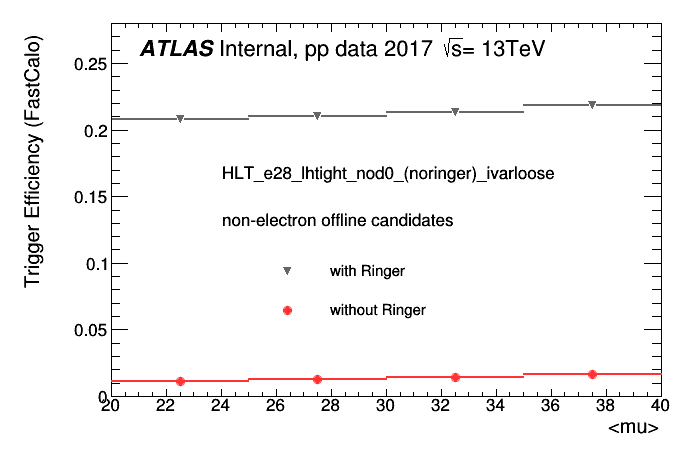

In [15]:
resize =  [4,20,40]
these_colors = [kGray+2,kRed-4]
these_markers = [23, 20]
these_transcolors = []
hists_mu = [
            GetProfile(h_data17_before_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_L2_match_mu'],
                       h_data17_before_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_L2_mu'], resize=resize),
            GetProfile(h_data17_before_ts1_egam7['HLT_e28_lhtight_nod0_ringer_ivarloose_L2_match_mu'],
                       h_data17_before_ts1_egam7['HLT_e28_lhtight_nod0_ringer_ivarloose_L2_mu'],resize=resize),
]
canvas = PlotProfiles( hists_mu, '<mu>', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=0.28, y_axes_minimum=0.0,
                       ylabel='Trigger Efficiency (FastCalo)')
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017 #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.32, 0.62, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
AddTexLabel(canvas, 0.32, 0.52, 'non-electron offline candidates', textsize=0.04)
AddLegend( canvas,0.35,0.3, ['with Ringer', 'without Ringer'] )
canvas.Draw()
canvas.SaveAs('eff_EGAM7_e28_ringer_and_noringer_2017_before_ts1_L2Calo_mu.pdf')